In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
fruits=pd.read_table('fruit_data_with_colors.txt')
fruits.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [7]:
fruits.count()

fruit_label      59
fruit_name       59
fruit_subtype    59
mass             59
width            59
height           59
color_score      59
dtype: int64

In [8]:
X=fruits[['height','width','mass','color_score']]
y=fruits['fruit_label']
X_train,X_test,y_train,y_test=X[:50],X[50:],y[:50],y[50:]

In [9]:
X_train.head(2)

,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59


In [10]:
X=fruits[['height','width','mass']]
y=fruits['fruit_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

### Create classifier object

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

### Train the classifier(fit the estimator) using the training data

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Use the trained K-NN classifier model to classify new,previously useen objects

In [17]:
X_test.head(6)

,height,width,mass
26,9.2,9.6,362
35,7.9,7.1,150
43,10.3,7.2,194
28,7.1,6.7,140
11,7.6,7.1,172
2,7.2,7.4,176


In [16]:
y_test.head(6)

26    3
35    3
43    4
28    3
11    1
2     1
Name: fruit_label, dtype: int64

In [19]:
fruit_prediction=knn.predict([[9.2,9.6,362]])
fruit_prediction

array([3], dtype=int64)

In [20]:
fruit_prediction=knn.predict([[9.2,9.6,362],[7.6,7.1,172]])
fruit_prediction

array([3, 1], dtype=int64)

In [21]:
names={1:'apple',2:'mandrain',3:'orange',4:'lemon'}
for each in fruit_prediction:
    print(names[each])

orange
apple


### Estimate the accuracy of the classifier on future data,using the test data

In [22]:
knn.score(X_test,y_test)

0.5333333333333333

In [26]:
k_range=range(1,20)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

In [27]:
scores

[0.6,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.5333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.26666666666666666,
 0.3333333333333333,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666]

### How Sensitive

<IPython.core.display.Javascript object>


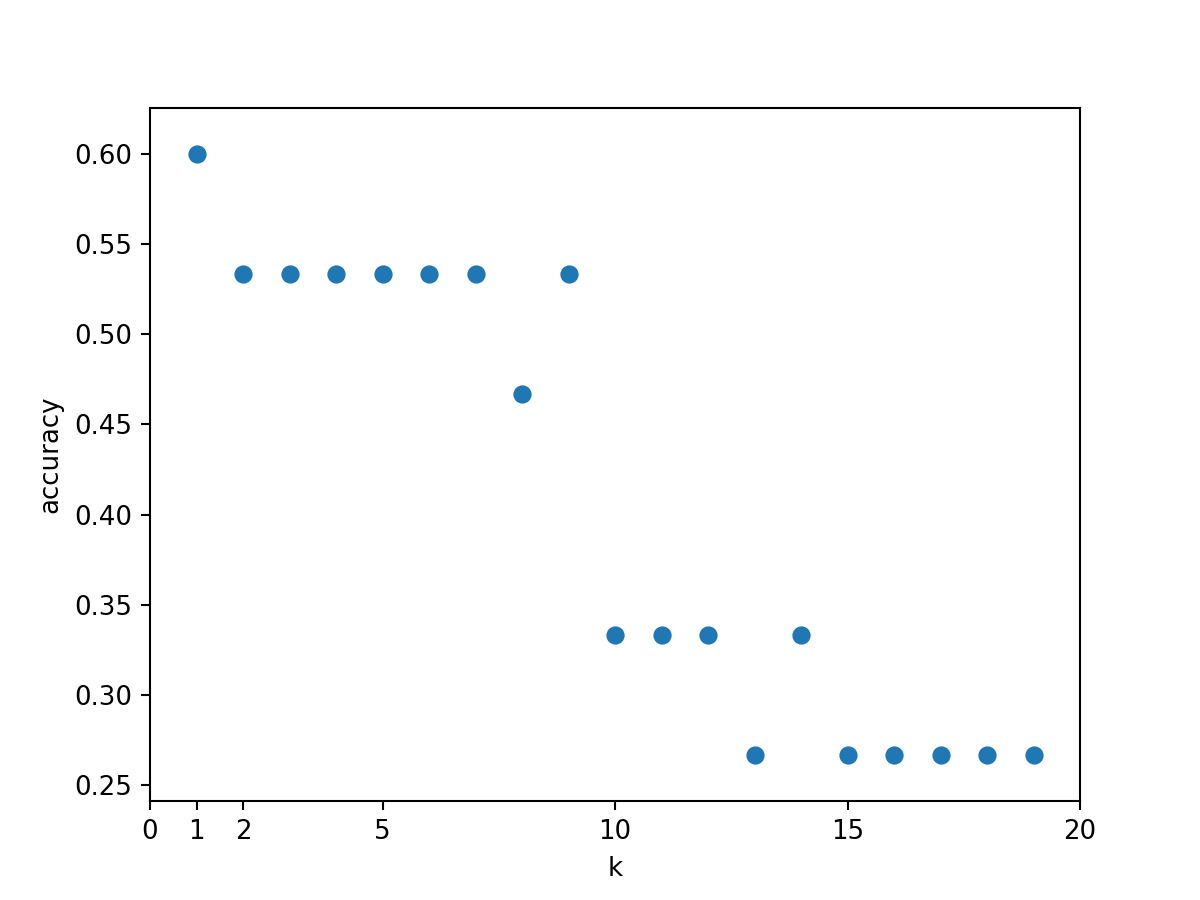

([<matplotlib.axis.XTick at 0x1cc95071ef0>,
 <a list of 7 Text xticklabel objects>)

In [28]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,1,2,5,10,15,20])